# State Visualisations

In this notebook I explore and visualise churn in relation to state

In [179]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
sns.set_style('darkgrid')
%matplotlib inline

# variable for file path from this directory
to_data = '../../../data/'

# import latest 
df = pd.read_csv(to_data + 'initial_clean_lc', index_col = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [90]:
states = gp.read_file('state_files_500/cb_2018_us_state_500k.shp')

In [91]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [180]:
churn = df.groupby('state')['churn'].mean()
# cases.name = 'total_cases'
churn.name = 'total_churn'
# churn.sort_values(ascending = False)

In [93]:
states = states.join(churn, on='STUSPS', how = 'right')

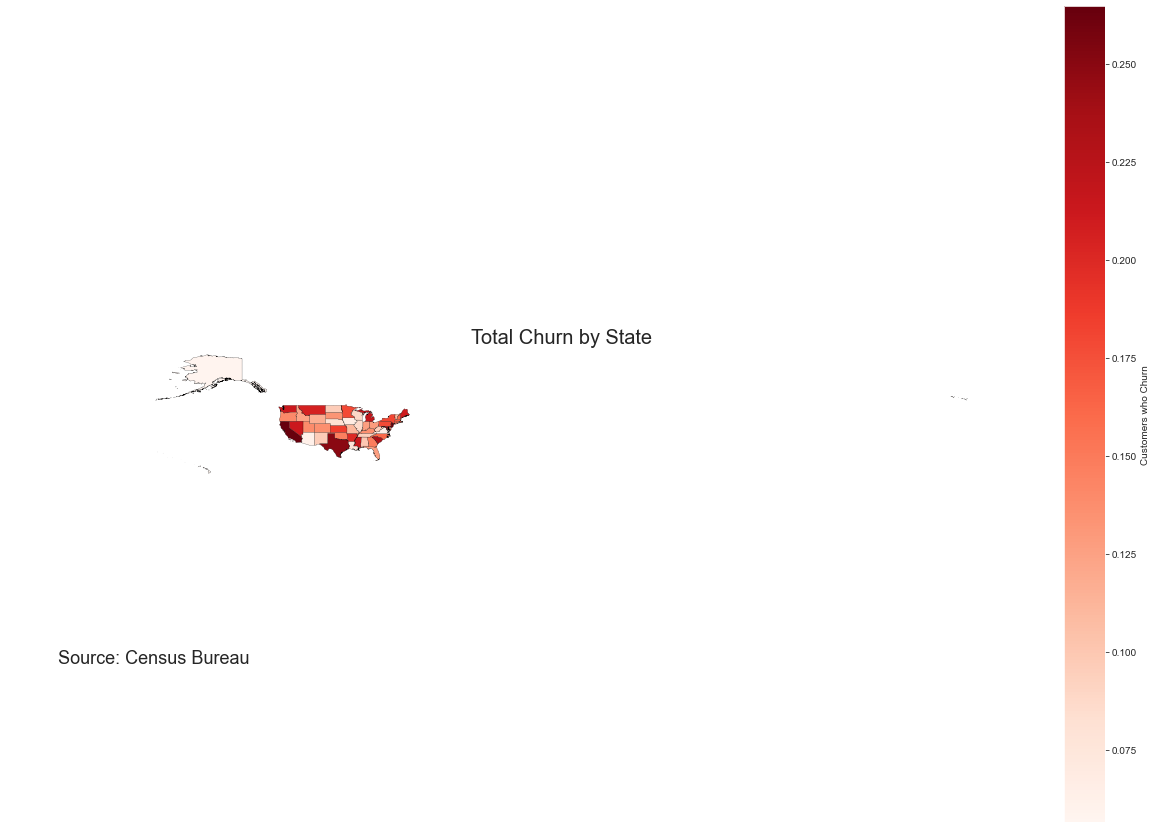

In [95]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Customers who Churn'});
# source the data
ax.annotate('Source: Census Bureau' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

# for _, row in states.iterrows():
#     xy = row['geometry'].centroid.coords
#     ax.annotate(row['total_churn'], xy=xy[0],
#                  horizontalalignment='center',
#                  color='white')

In [87]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,total_churn
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",0.215385
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",0.161765
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",0.147541
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",0.064935
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",0.094340
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",0.078431
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",0.219178
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",0.169231
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",0.123288
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",0.126984


In [88]:
states.drop(index = 36, inplace = True)

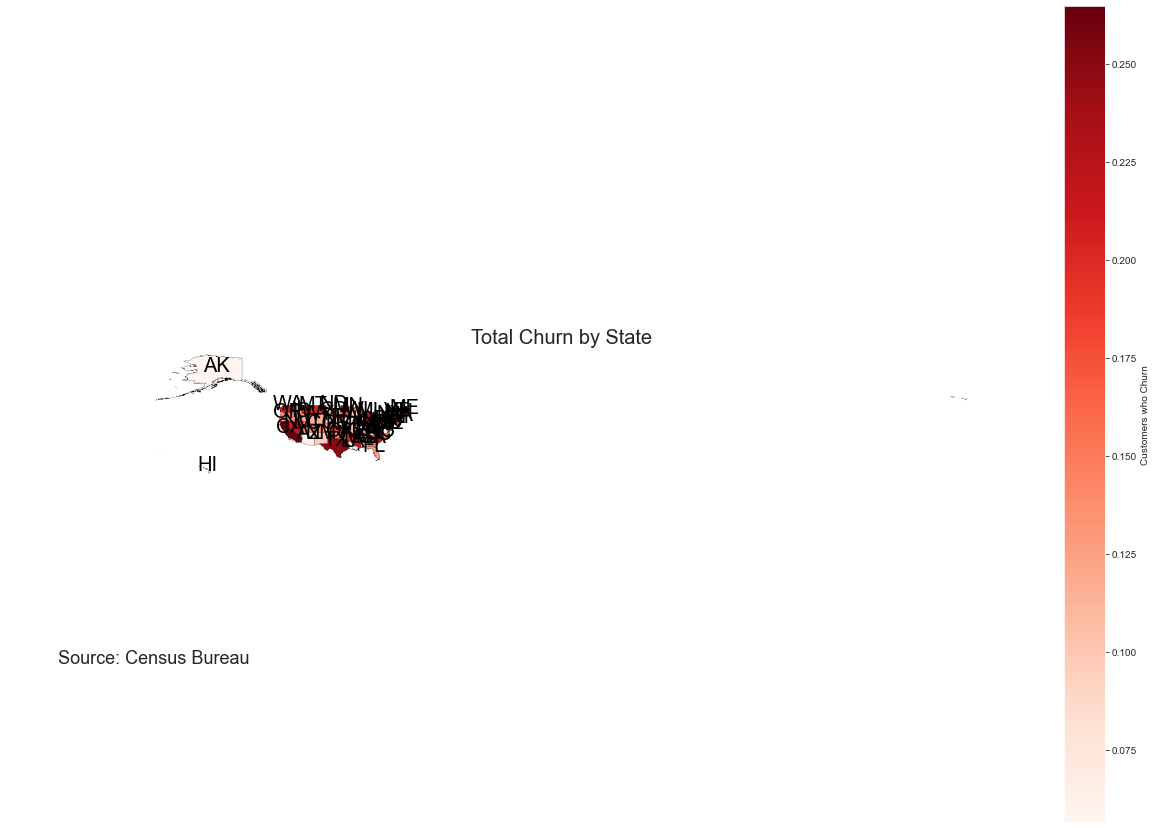

In [96]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Customers who Churn'});
# source the data
ax.annotate('Source: Census Bureau' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

for _, row in states.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(row['STUSPS'], xy=xy[0],
                 horizontalalignment='center',
                 color='black', fontsize = 20)

In [79]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,total_churn
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",0.215385
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",0.161765
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",0.147541
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",0.064935
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",0.094340
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",0.078431
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",0.219178
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",0.169231
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",0.123288
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",0.126984


In [ ]:
states

In [49]:
df.state.unique().sort()

In [58]:
df.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [59]:
states.STUSPS.unique().sort()

In [60]:
states.STUSPS.unique()

array(['NE', 'WA', 'NM', 'SD', 'TX', 'CA', 'KY', 'OH', 'AL', 'GA', 'WI',
       'OR', 'PA', 'MS', 'MO', 'NC', 'OK', 'WV', 'NY', 'IN', 'KS', 'ID',
       'NV', 'VT', 'MT', 'MN', 'ND', 'HI', 'AZ', 'DE', 'RI', 'CO', 'UT',
       'VA', 'WY', 'LA', 'MI', 'MA', 'FL', 'CT', 'NJ', 'MD', 'SC', 'ME',
       'NH', 'DC', 'IA', 'AR', 'TN', 'IL', 'AK'], dtype=object)

In [36]:
# for item in states.STUSPS:
#     if item not in df.state.unique():
#         states.drop(item, axis = 0, inplace = True)
        
for row in states:
    print(row)
    if row['STUSPS'] not in df.state.unique():
        states.drop(row, axis = 0, inplace = True)

STATEFP


TypeError: string indices must be integers

In [35]:
states.iloc[0]#['STUSPS']

STATEFP                                                       31
STATENS                                                 01779792
AFFGEOID                                             0400000US31
GEOID                                                         31
STUSPS                                                        NE
NAME                                                    Nebraska
LSAD                                                          00
ALAND                                               198956658395
AWATER                                                1371829134
geometry       POLYGON ((-104.053514 41.157257, -104.052666 4...
total_churn                                                    5
Name: 0, dtype: object

In [67]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,total_churn
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",0.081967
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",0.212121
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",0.096774
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",0.133333
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",0.250000
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",0.264706
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...",0.135593
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ...",0.128205
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",0.100000
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984...",0.148148


In [62]:
states = states.join(churn, on='STUSPS', how = 'right')

ValueError: columns overlap but no suffix specified: Index(['total_churn'], dtype='object')

In [42]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,total_churn
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",5.0
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217...",14.0
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",6.0
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9...",8.0
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9...",18.0
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",9.0
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...",8.0
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ...",10.0
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",8.0
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984...",8.0


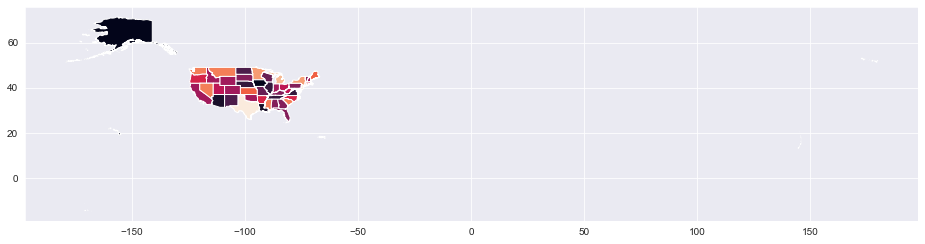

In [21]:
fig, ax = plt.subplots(figsize=(16,12))
states.plot(ax=ax, column='total_churn');

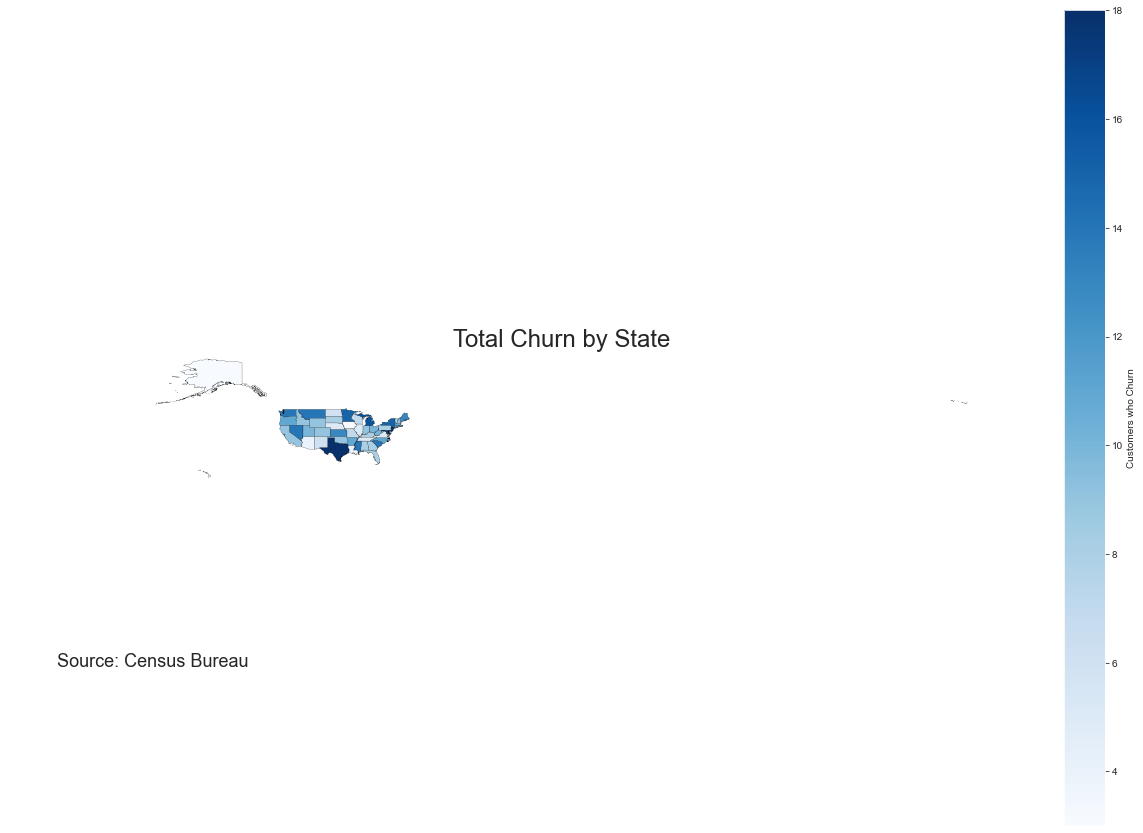

In [53]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 24, 'fontweight':10})
# plot the map
states.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Blues', legend=True,
            legend_kwds={'label': 'Customers who Churn'});
# source the data
ax.annotate('Source: Census Bureau' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

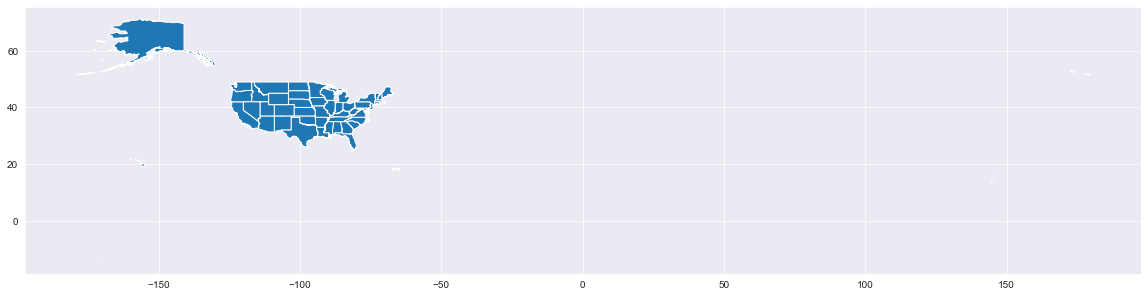

In [15]:
fig, ax = plt.subplots(figsize = (20, 20))
states.plot(ax = ax)

# trying again

In [99]:
states_01 = gp.read_file('state_files_again/tl_2017_us_state.shp')

In [105]:
states_01 = states_01.join(churn, on='STUSPS', how = 'right')

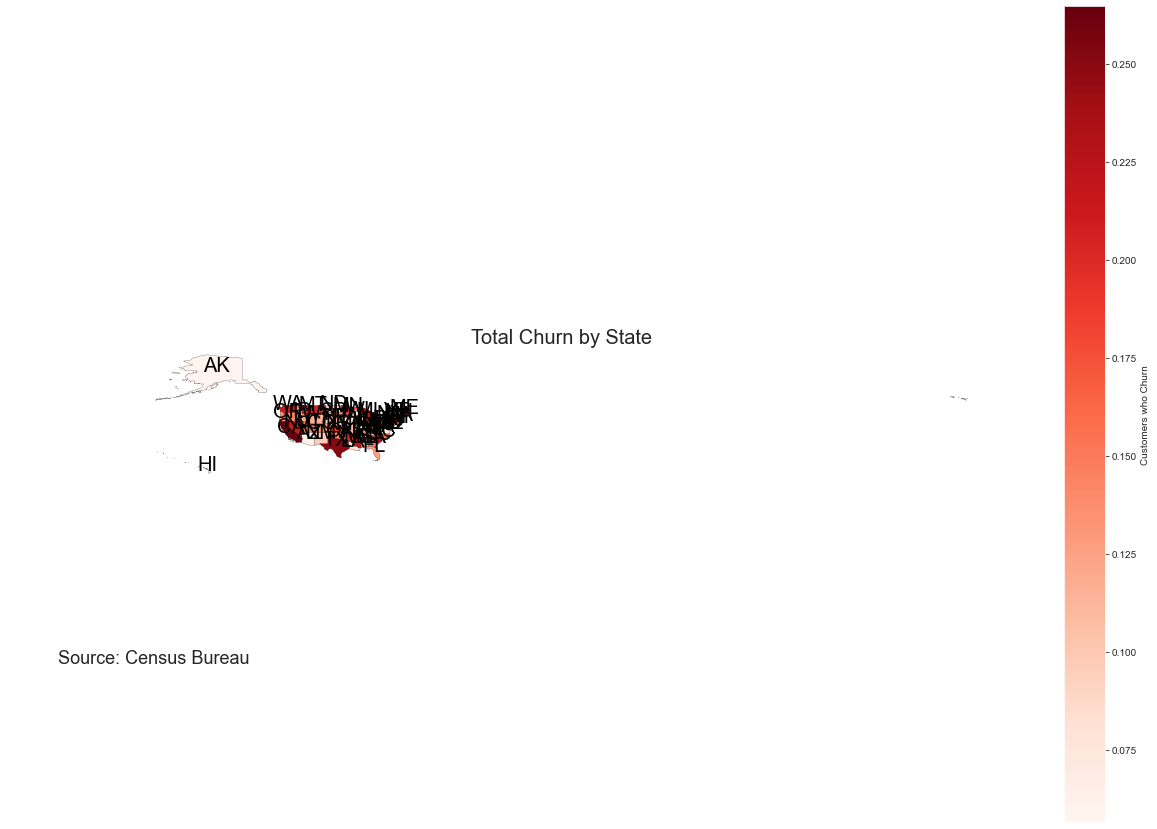

In [115]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states_01.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Customers who Churn'});
# source the data
ax.annotate('Source: Census Bureau' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

for _, row in states.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(row['STUSPS'], xy=xy[0],
                 horizontalalignment='center',
                 color='black', fontsize = 20)

# and again

In [107]:
states_02 = gp.read_file('states_basic/states.shp')

In [112]:
states_02

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747..."


In [178]:
states_02 = states_02.join(churn, on='STATE_ABBR', how = 'right')

ValueError: columns overlap but no suffix specified: Index(['total_churn'], dtype='object')

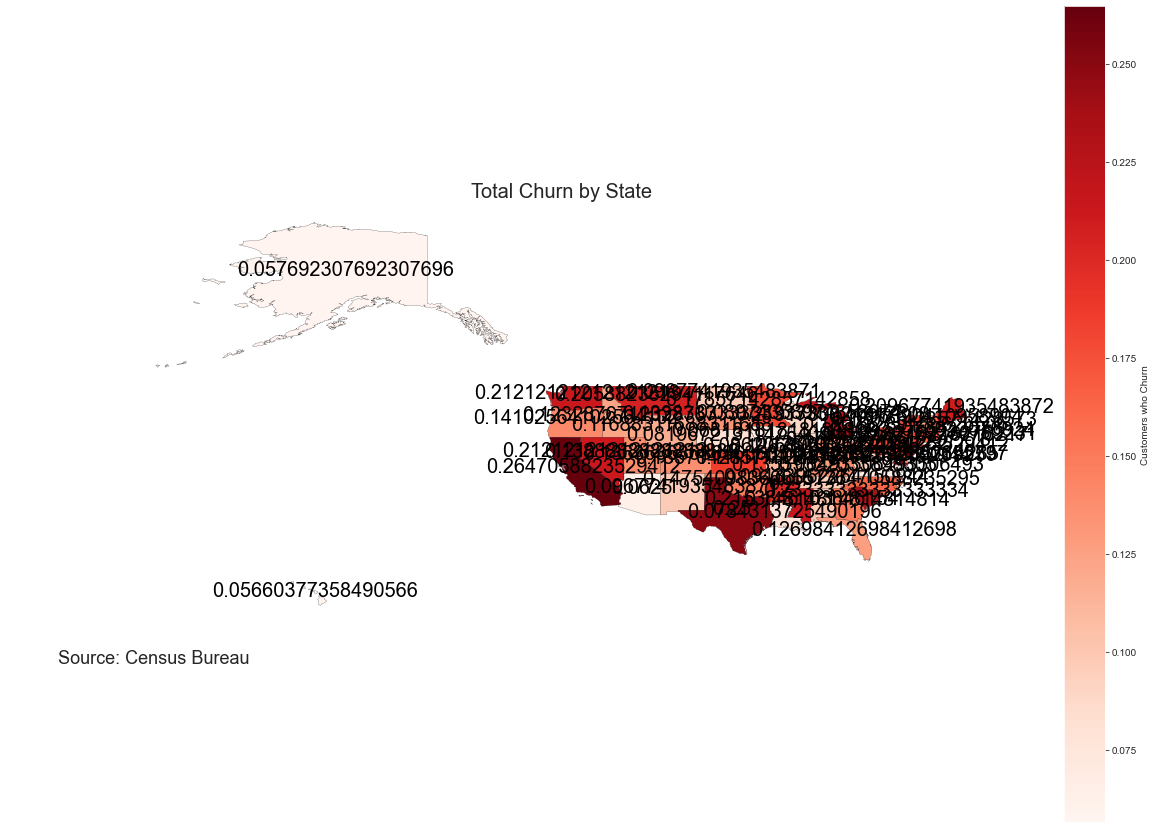

In [117]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states_02.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Customers who Churn'});
# source the data
ax.annotate('Source: Census Bureau' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

for _, row in states.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(row['total_churn'], xy=xy[0],
                 horizontalalignment='center',
                 color='black', fontsize = 20)

# yayyyyy

now i just want to add percentages instead

In [118]:
states_02

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,total_churn
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",0.056604
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",0.212121
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",0.205882
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",0.209677
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",0.096774
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",0.133333
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",0.116883
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ...",0.089744
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",0.123288
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747...",0.109589


In [120]:
round(states_02['total_churn'], ndigits = 3) * 100

0      5.7
1     21.2
2     20.6
3     21.0
4      9.7
5     13.3
6     11.7
7      9.0
8     12.3
9     11.0
10    17.9
11    14.1
12    16.1
13     6.8
14    16.9
15     8.2
16    18.1
17    17.8
18    16.2
19     9.2
20    26.5
21    12.7
22    21.2
23    13.9
24    26.5
25    12.8
26     8.6
27     9.3
28    14.8
29     9.4
30    24.3
31    13.6
32    13.6
33    18.6
34     6.5
35    11.1
36     6.2
37    14.8
38    16.2
39     9.4
40    25.0
41     9.7
42    10.0
43    21.5
44    14.8
45    23.3
46    20.0
47     7.8
48    12.7
49    21.9
50     5.8
Name: total_churn, dtype: float64

In [133]:
states_02['churn_perc'] = round(states_02['total_churn'] * 100, ndigits = 2)

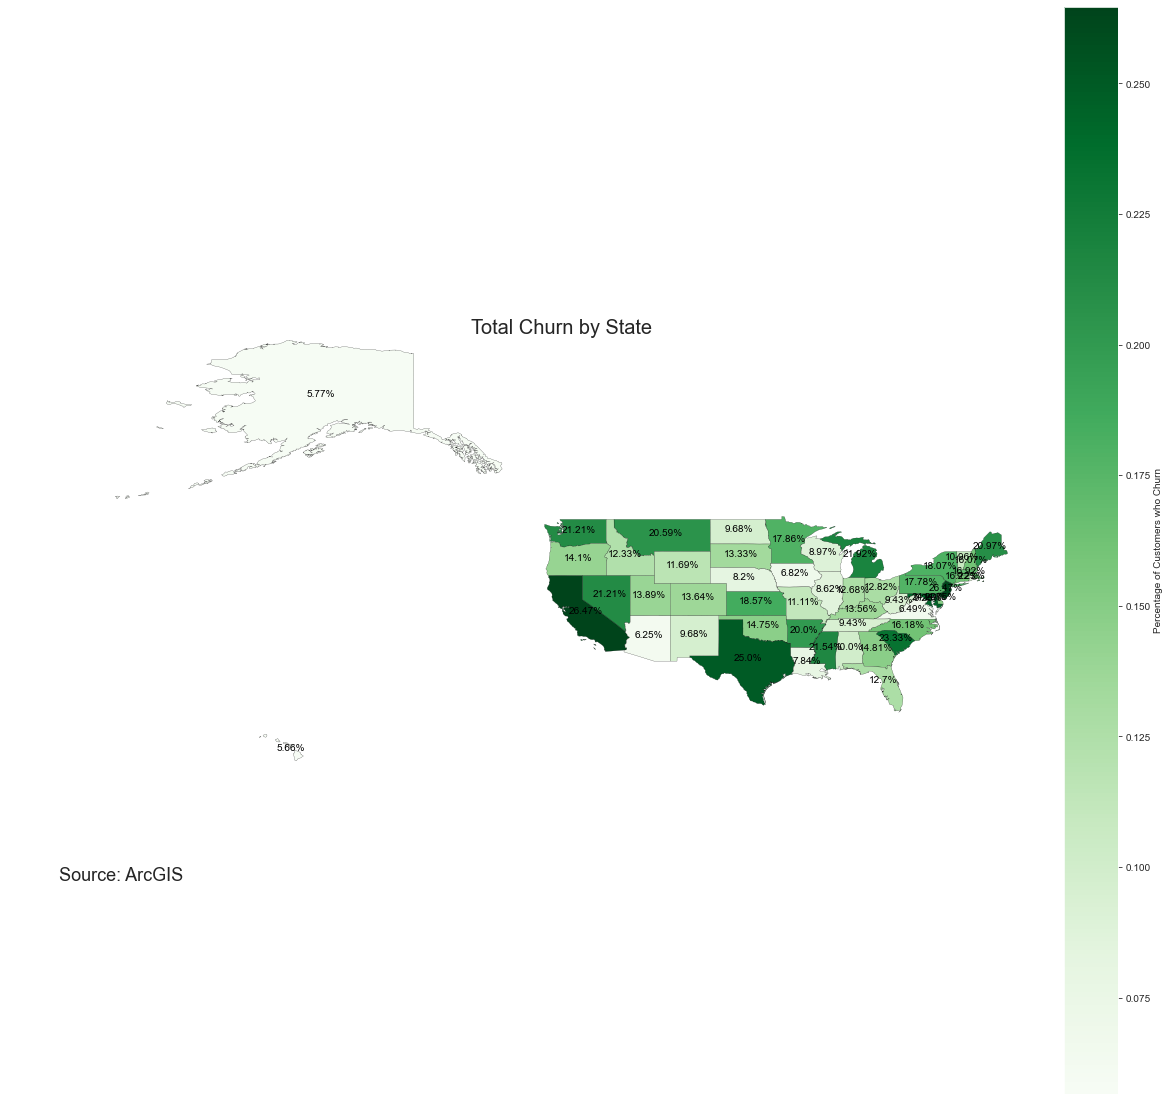

In [156]:
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states_02.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Greens', legend=True,
            legend_kwds={'label': 'Percentage of Customers who Churn'});
# source the data
ax.annotate('Source: ArcGIS' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

for _, row in states_02.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(f'{row.churn_perc}%', xy=xy[0],
                 horizontalalignment='center',
                 color='black', fontsize = 10)
    
minx, miny, maxx, maxy = states_02.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.savefig('churn_by_state.png')

In [151]:
print(minx, miny, maxx, maxy)

-178.21759836236586 18.92178634508703 -66.96927125875777 71.40623539396698


# try just dropping alaska and HI

In [166]:
states_02

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,total_churn,churn_perc
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",0.056604,5.66
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",0.212121,21.21
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",0.205882,20.59
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",0.209677,20.97
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",0.096774,9.68
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",0.133333,13.33
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",0.116883,11.69
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ...",0.089744,8.97
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",0.123288,12.33
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747...",0.109589,10.96


In [167]:
states_03 = states_02.drop(index = 50)

In [168]:
states_03

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,total_churn,churn_perc
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",0.056604,5.66
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",0.212121,21.21
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",0.205882,20.59
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",0.209677,20.97
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",0.096774,9.68
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",0.133333,13.33
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",0.116883,11.69
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ...",0.089744,8.97
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",0.123288,12.33
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747...",0.109589,10.96


In [169]:
states_03 = states_03.drop(index = 0)

In [170]:
states_03

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,total_churn,churn_perc
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",0.212121,21.21
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",0.205882,20.59
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",0.209677,20.97
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",0.096774,9.68
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",0.133333,13.33
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",0.116883,11.69
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ...",0.089744,8.97
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",0.123288,12.33
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747...",0.109589,10.96
10,Minnesota,11,27,West North Central,MN,"POLYGON ((-91.73037 43.49957, -92.07753 43.499...",0.178571,17.86


In [182]:
states_03.drop('total_churn', axis = 1, inplace = True)

In [183]:
states_03 = states_03.join(churn, on='STATE_ABBR', how = 'right')

In [184]:
states_03

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,churn_perc,total_churn
1.0,Washington,2.0,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",21.21,0.212121
2.0,Montana,3.0,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",20.59,0.205882
3.0,Maine,4.0,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",20.97,0.209677
4.0,North Dakota,5.0,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",9.68,0.096774
5.0,South Dakota,6.0,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",13.33,0.133333
6.0,Wyoming,7.0,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",11.69,0.116883
7.0,Wisconsin,8.0,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ...",8.97,0.089744
8.0,Idaho,9.0,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",12.33,0.123288
9.0,Vermont,10.0,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747...",10.96,0.109589
10.0,Minnesota,11.0,27,West North Central,MN,"POLYGON ((-91.73037 43.49957, -92.07753 43.499...",17.86,0.178571


In [186]:
states_03 = states_03.dropna()

In [203]:
states_03['churn_perc'] = round(states_03['churn_perc'], ndigits=0).astype(int)

/opt/anaconda3/envs/mod3-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


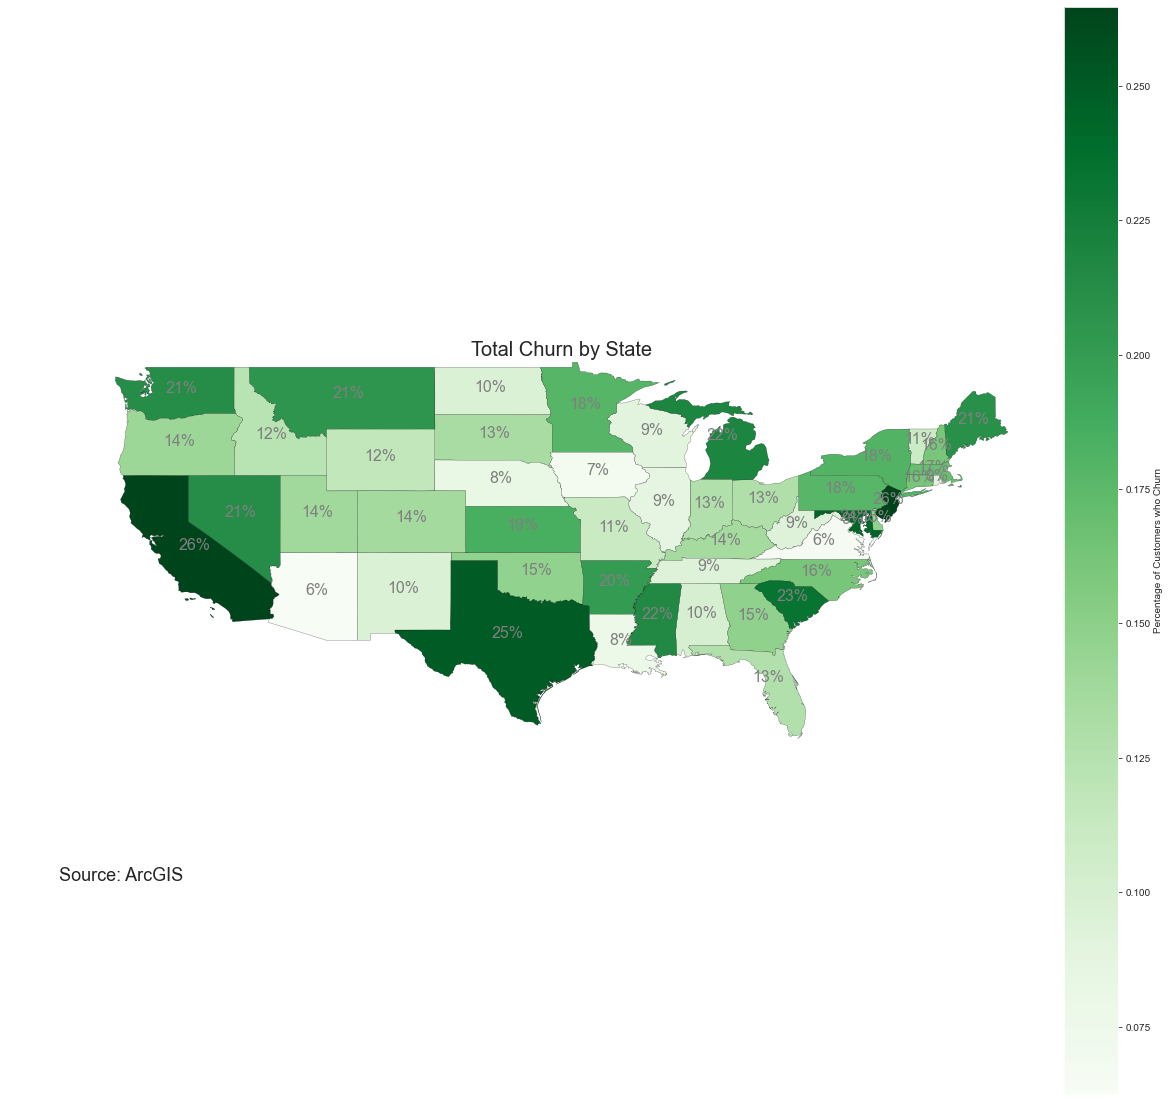

In [205]:
fig, ax = plt.subplots(figsize=(20,20))
ax.axis('off')
ax.set_title('Total Churn by State',
            fontdict={'fontsize': 20, 'fontweight':10})
# plot the map
states_03.plot(ax=ax, column='total_churn',
            edgecolor='black', linewidth=.2,
            cmap='Greens', legend=True,
            legend_kwds={'label': 'Percentage of Customers who Churn'});
# source the data
ax.annotate('Source: ArcGIS' ,
            xy=(0.05, .2),  xycoords='figure fraction', 
            fontsize=18);

for _, row in states_03.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(f'{row.churn_perc}%', xy=xy[0],
                 horizontalalignment='center',
                 color='grey', fontsize = 16)
    
minx, miny, maxx, maxy = states_03.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.savefig('churn_by_state.png')